In [4]:
import struct, gzip
import scipy.io
import numpy as np
import pandas as pd

In [5]:
# Credit : https://github.com/daniel-e/mnist_octave
# Load Data Set

def loadY(fnlabel):
	f = gzip.open(fnlabel, 'rb')
	f.read(8)
	return np.frombuffer(f.read(), dtype = np.uint8)

def loadX(fnimg):
	f = gzip.open(fnimg, 'rb')
	f.read(16)
	return np.frombuffer(f.read(), dtype = np.uint8).reshape((-1, 28*28))

In [6]:
trainX = loadX("C:\\Users\\hp\\Downloads\\mnist_octave-master\\train-images-idx3-ubyte.gz")
trainY = loadY("C:\\Users\\hp\\Downloads\\mnist_octave-master\\train-labels-idx1-ubyte.gz")

testX = loadX("C:\\Users\\hp\\Downloads\\mnist_octave-master\\t10k-images-idx3-ubyte.gz")
testY = loadY("C:\\Users\\hp\Downloads\\mnist_octave-master\\t10k-labels-idx1-ubyte.gz")

In [7]:
data = {"trainX": trainX, "trainY": trainY, "testX": testX, "testY": testY}
scipy.io.savemat("mnist.mat", data, do_compression = True)

In [8]:
import scipy.io as sio
import matplotlib.pyplot as plt

In [9]:
data = sio.loadmat("mnist.mat")

train_X = data['trainX']  # shape = (60000, 768)
train_Y = data['trainY'][0]  # shape = (1, 60000)


print('Size Of Train - X : ',train_X.shape)
print('Size Of Train - Y : ',train_Y.shape)

Size Of Train - X :  (60000, 784)
Size Of Train - Y :  (60000,)


In [10]:
test_X = data['testX']  # shape = (60000, 768)
test_Y = data['testY'][0]  # shape = (1, 60000)

5


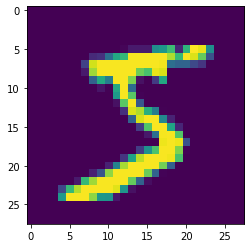

0


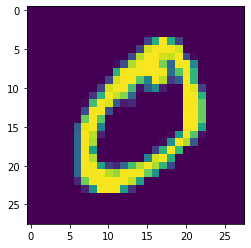

4


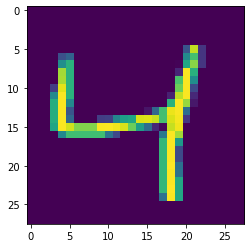

1


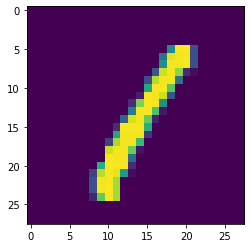

9


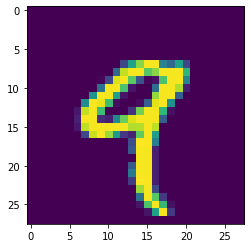

2


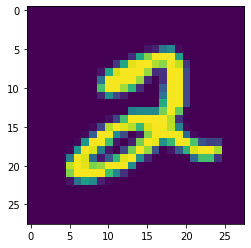

1


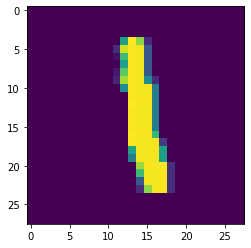

3


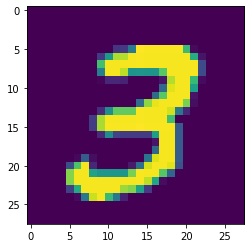

1


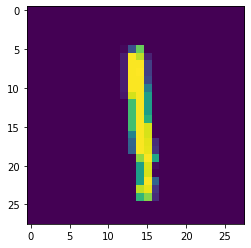

4


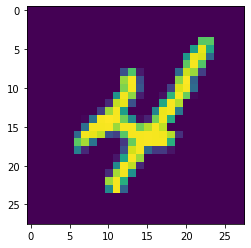

In [11]:
for i in range(10):
	print(train_Y[i])
	plt.imshow(train_X[i].reshape((28, 28)) / 255.0)
	plt.show()

In [12]:
print(train_X[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [13]:
train_X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
train_Y[0]

5

In [15]:
df = pd.concat([pd.DataFrame(train_X),pd.DataFrame(train_Y,columns=['number'])],axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,number
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [16]:
# Get Sample from Population

df_sample = df.sample(n = 10000)
df_sample

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,number
17702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
6024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
17637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
24678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [17]:
train_sample_Y  = df_sample['number']
train_sample_X =  df_sample.drop('number', 1)

In [18]:
# Sample Data Set

train_sample_X

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
17702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# check whether null values contain or not,
if((len([i  for i in list(df.isnull().sum()) if i >0 ])>0)):
    print('Need to Handle Missing Values ')
else :
    print('No NaN values found')

No NaN values found


Text(0, 0.5, 'Frequency')

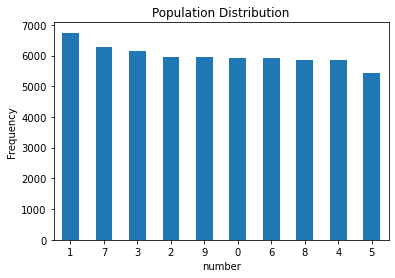

In [20]:
# Check data set is balanced or not

count_classes = pd.value_counts(df['number'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Population Distribution")
plt.xticks(range(10))
plt.xlabel("number")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

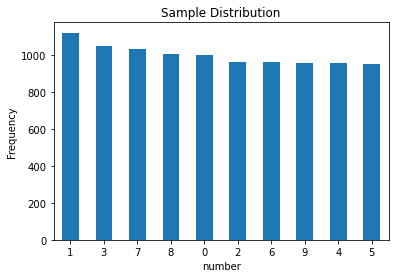

In [21]:
# Check data set is balanced or not

count_classes = pd.value_counts(df_sample['number'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Sample Distribution")
plt.xticks(range(10))
plt.xlabel("number")
plt.ylabel("Frequency")

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [23]:
def findSuitableKValue(start,end):
    accuracy_rate = []
    for i in range(start,end):
        knn = KNeighborsClassifier(n_neighbors=i)
        score=cross_val_score(knn,train_sample_X,train_sample_Y,cv=10)
        accuracy_rate.append(score.mean())
        
    plt.figure(figsize=(10,6))
    plt.plot(range(start,end),accuracy_rate,color='blue', linestyle='dashed', marker='o',
    markerfacecolor='red', markersize=10)
    plt.title('Accurancy Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Accurancy Rate')
    

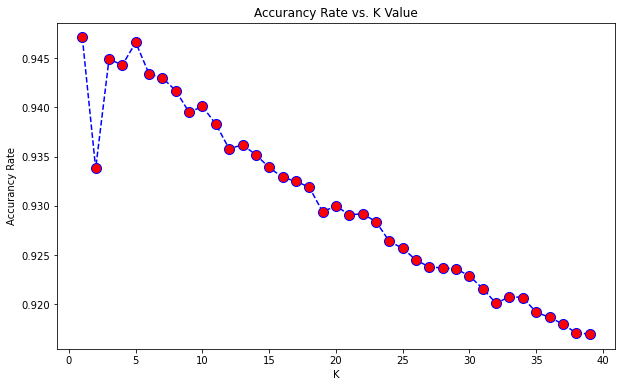

In [24]:
# Check suitable K value (1,40)
findSuitableKValue(1,40)

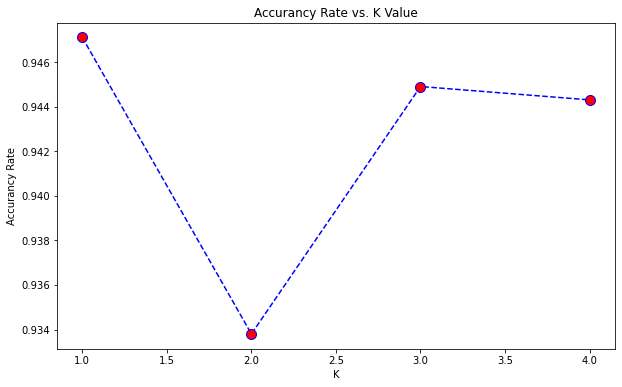

In [25]:
# Check suitable K value (1,5)
findSuitableKValue(1,5)

In [26]:
# Here We Choose Suitable K Value => 1

knn = KNeighborsClassifier(n_neighbors=1)
score=cross_val_score(knn,train_sample_X,train_sample_Y,cv=5)

In [27]:
print('KNN Score for Training Data : ',score.mean())

KNN Score for Training Data :  0.9435


In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

In [29]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    },

}

In [30]:
# Check Accurancy With Training Data

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(train_sample_X,train_sample_Y)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.9430,"{'svc__C': 100, 'svc__kernel': 'rbf'}"
1,random_forest,0.9051,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.8809,{'logisticregression__C': 1}


In [31]:
# Check Accurancy With Test Data
algo_list = ['svm','random_forest','logistic_regression']
for algo in algo_list:
    print(algo,' : ', best_estimators[algo].score(test_X,test_Y))
print('KNN : ',KNeighborsClassifier(n_neighbors=1).fit(train_sample_X,train_sample_Y).score(test_X,test_Y))    

svm  :  0.951
random_forest  :  0.9133
logistic_regression  :  0.888
KNN :  0.9498


In [32]:
# When considering the score of training data, testing data we can decide 'SVM','KNN' are  best algorithom for data  set